In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 40.5MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('multiclass.csv')
display(df.head())

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [ ]:
display(df.isnull().sum())

,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0
class,0


**Reasoning**:
Identify the categorical features for One-Hot Encoding, excluding the 'class' column.



In [ ]:
categorical_features = ['Region']

**Reasoning**:
Apply Label Encoding to the 'class' column using `LabelEncoder`.



In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
display(df.head())

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,1
1,3,7057,9810,9568,1762,3293,1776,1
2,3,6353,8808,7684,2405,3516,7844,1
3,3,13265,1196,4221,6404,507,1788,0
4,3,22615,5410,7198,3915,1777,5185,0


**Reasoning**:
Apply One-Hot Encoding to the 'Region' column.



In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

ohe = OneHotEncoder(sparse_output=False)
encoded_features = ohe.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_features))
display(encoded_df.head())

,Region_1,Region_2,Region_3
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


**Reasoning**:
Identify the numerical columns, create a DataFrame with only numerical columns, and then concatenate the numerical DataFrame, the one-hot encoded DataFrame, and the label-encoded 'class' column.



In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('class')
numerical_features.remove('Region')
df_numerical = df[numerical_features]

df_encoded = pd.concat([df_numerical, encoded_df, df['class']], axis=1)
display(df_encoded.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,class
0,12669,9656,7561,214,2674,1338,0.0,0.0,1.0,1
1,7057,9810,9568,1762,3293,1776,0.0,0.0,1.0,1
2,6353,8808,7684,2405,3516,7844,0.0,0.0,1.0,1
3,13265,1196,4221,6404,507,1788,0.0,0.0,1.0,0
4,22615,5410,7198,3915,1777,5185,0.0,0.0,1.0,0


# Task
Load the dataset "ObesityDataSet.csv", print the dataframe, count null values, encode categorical features using Label Encoding and One-Hot Encoding, and scale numerical features using standardization.

## Identify numerical features

### Subtask:
Determine which columns in the encoded DataFrame are numerical and need to be scaled.


**Reasoning**:
Identify numerical columns in the encoded DataFrame, excluding the target variable 'class'.



In [ ]:
numerical_cols_to_scale = df_encoded.select_dtypes(include=np.number).columns.tolist()
numerical_cols_to_scale.remove('class')
print(numerical_cols_to_scale)

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Region_1', 'Region_2', 'Region_3']


**Reasoning**:
Review the distribution of numerical features to decide between StandardScaler and MinMaxScaler.



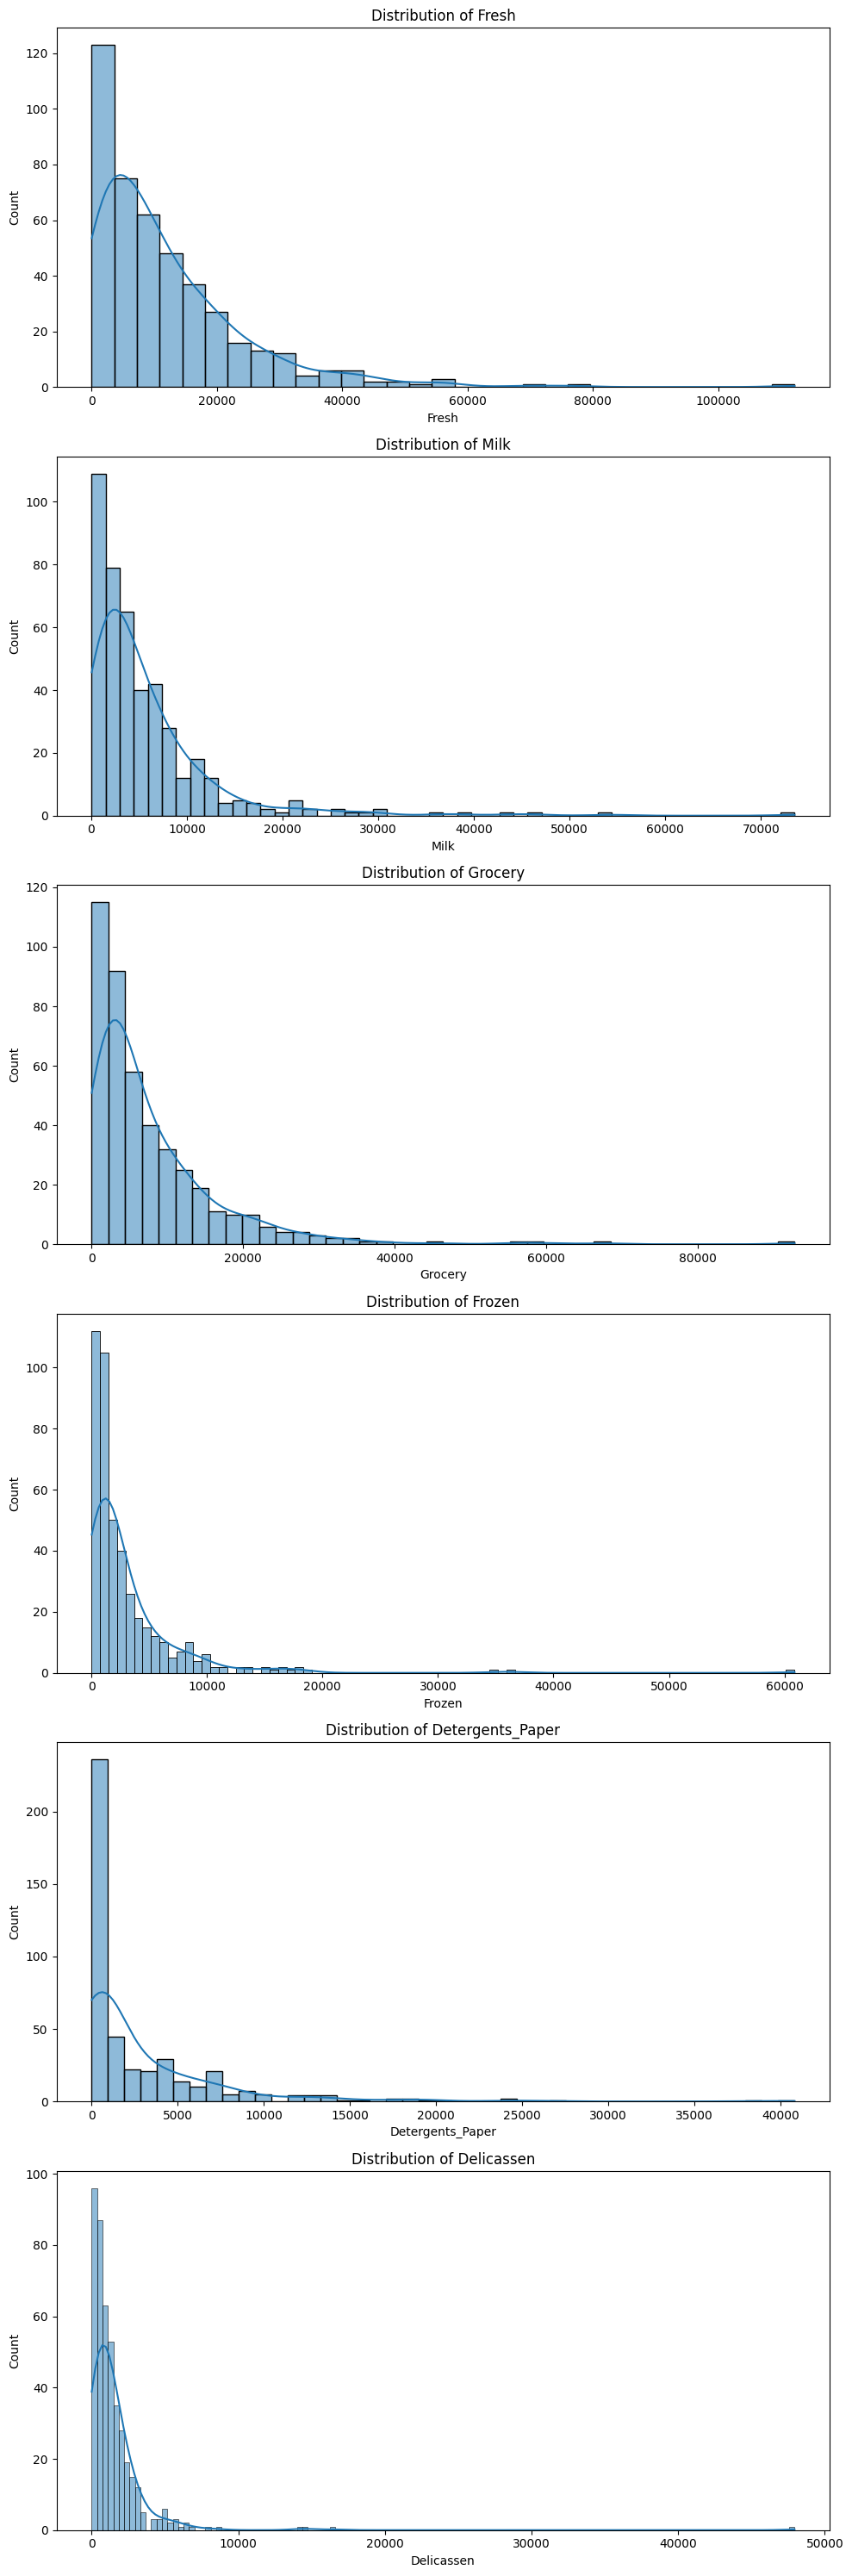

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numerical_subset = df[numerical_features]

fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 5 * len(numerical_features)))

for i, col in enumerate(numerical_features):
    sns.histplot(df_numerical_subset[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Reasoning**:
Apply StandardScaler to the numerical features in the encoded DataFrame.



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(df_encoded[numerical_cols_to_scale])
display(scaled_numerical_features[:5])

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906, -0.46056619, -0.34582203,  0.62642243],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105, -0.46056619, -0.34582203,  0.62642243],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255, -0.46056619, -0.34582203,  0.62642243],
       [ 0.10011141, -0.62401993, -0.3929769 ,  0.6871443 , -0.49858822,
         0.09341105, -0.46056619, -0.34582203,  0.62642243],
       [ 0.84023948, -0.05239645, -0.07935618,  0.17385884, -0.23191782,
         1.29934689, -0.46056619, -0.34582203,  0.62642243]])

**Reasoning**:
Create a DataFrame from the scaled numerical features and concatenate it with the 'class' column from the original DataFrame.



In [ ]:
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_cols_to_scale)
df_scaled = pd.concat([scaled_numerical_df, df_encoded['class']], axis=1)
display(df_scaled.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,class
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,-0.460566,-0.345822,0.626422,1
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,-0.460566,-0.345822,0.626422,1
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,-0.460566,-0.345822,0.626422,1
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.460566,-0.345822,0.626422,0
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,-0.460566,-0.345822,0.626422,0


In [ ]:
class_counts = df_scaled['class'].value_counts()
display(class_counts)

,count
class,
1,180
2,173
0,87


# Task
Balance the dataset using SMOTE and display the class distribution of the balanced dataset.

## Separate features and target

### Subtask:
Separate the features (X) and the target variable (y) from the scaled DataFrame.


**Reasoning**:
Separate the features (X) and the target variable (y) from the scaled DataFrame.



In [ ]:
X = df_scaled.drop('class', axis=1)
y = df_scaled['class']
display(X.head())
display(y.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,-0.460566,-0.345822,0.626422
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,-0.460566,-0.345822,0.626422
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,-0.460566,-0.345822,0.626422
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.460566,-0.345822,0.626422
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,-0.460566,-0.345822,0.626422


,class
0,1
1,1
2,1
3,0
4,0


**Reasoning**:
Apply SMOTE to balance the dataset and display the class distribution of the balanced dataset.



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

class_counts_resampled = y_resampled.value_counts()
display(class_counts_resampled)

,count
class,
1,180
0,180
2,180


## Check class distribution

### Subtask:
Check the class distribution of the balanced dataset to confirm the SMOTE operation was successful.


**Reasoning**:
Check the class distribution of the balanced dataset to confirm the SMOTE operation was successful.



In [ ]:
display(y_resampled.value_counts())

,count
class,
1,180
0,180
2,180


In [ ]:
display(X_resampled.shape)
display(y_resampled.shape)

(540, 9)

(540,)

In [ ]:
correlation_matrix = X_resampled.corr(method='pearson')
display(correlation_matrix)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3
Fresh,1.000000,0.068890,-0.040529,0.336924,-0.128019,0.227329,-0.024625,-0.038387,0.047191
Milk,0.068890,1.000000,0.738306,0.115445,0.671705,0.410496,-0.029496,-0.034459,0.048594
Grocery,-0.040529,0.738306,1.000000,-0.047089,0.925828,0.217071,-0.031984,0.042202,-0.002089
Frozen,0.336924,0.115445,-0.047089,1.000000,-0.139312,0.370820,-0.039440,0.052208,-0.002692
Detergents_Paper,-0.128019,0.671705,0.925828,-0.139312,1.000000,0.082837,-0.024232,0.052623,-0.015800
Delicassen,0.227329,0.410496,0.217071,0.370820,0.082837,1.000000,-0.025929,-0.036855,0.047236
Region_1,-0.024625,-0.029496,-0.031984,-0.039440,-0.024232,-0.025929,1.000000,-0.159253,-0.733484
Region_2,-0.038387,-0.034459,0.042202,0.052208,0.052623,-0.036855,-0.159253,1.000000,-0.554223
Region_3,0.047191,0.048594,-0.002089,-0.002692,-0.015800,0.047236,-0.733484,-0.554223,1.000000


In [ ]:
feature_variances = X_resampled.var()
display(feature_variances)

,0
Fresh,0.872767
Milk,0.857213
Grocery,0.861021
Frozen,0.900753
Detergents_Paper,0.852920
Delicassen,0.833550
Region_1,0.997673
Region_2,1.006717
Region_3,1.001127


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(432, 9)

(108, 9)

(432,)

(108,)

In [ ]:
import numpy as np

# Create a mask to exclude self-correlations and duplicate pairs
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
masked_correlation_matrix = correlation_matrix.mask(mask)

# Unstack the matrix and drop NaN values
stacked_correlations = masked_correlation_matrix.unstack().dropna()

# Sort the values in descending order and get the top 5
top_5_correlations = stacked_correlations.sort_values(ascending=False).head(5)

display(top_5_correlations)

Grocery  Detergents_Paper    0.925828
Milk     Grocery             0.738306
         Detergents_Paper    0.671705
         Delicassen          0.410496
Frozen   Delicassen          0.370820
dtype: float64

In [ ]:
import numpy as np

def knn(x, y, queryPoint, k):
  y = y.to_numpy() # Convert pandas Series to NumPy array
  dist = np.sqrt(np.sum((queryPoint - x)**2, axis=1))
  # Create a structured array directly
  distances = np.empty(len(dist), dtype=[('distance', float), ('class', int)])def knn(x,y,queryPoin,k):
  dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )
  distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
  distances = sorted(distances)
  distances = distances[:k]
  distances = np.array(distances)
  classes_counts = np.unique(distances[:,1],return_counts=True)
  index = classes_counts[1].argmax()
  pred = classes_counts[0][index]
  return int(pred),distances
  distances['distance'] = dist
  distances['class'] = y
  distances = np.sort(distances, order='distance')
  distances = distances[:k]
  classes_counts = np.unique(distances['class'], return_counts=True)
  index = classes_counts[1].argmax()
  pred = classes_counts[0][index]
  return int(pred), distances

In [ ]:
pred,neighbors = knn(X_train, y_train, X_train.iloc[50].to_numpy(), 7)
print(neighbors)
print(pred)

[(0.        , 2) (0.16752299, 0) (0.18826533, 0) (0.22128759, 2)
 (0.22958938, 2) (0.25181863, 0) (0.26007155, 2)]
2


In [ ]:
import numpy as np

def knn(x, y, queryPoint, k):
  y = y.to_numpy() # Convert pandas Series to NumPy array
  dist = np.sqrt(np.sum((queryPoint - x)**2, axis=1))
  # Create a structured array directly with explicit dtypes
  distances = np.empty(len(dist), dtype=[('distance', float), ('class', int)])
  distances['distance'] = dist
  distances['class'] = y
  distances = np.sort(distances, order='distance')
  distances = distances[:k]
  classes_counts = np.unique(distances['class'], return_counts=True)
  index = classes_counts[1].argmax()
  pred = classes_counts[0][index]
  return int(pred), distances

In [ ]:
pred, neighbors = knn(X_train, y_train, X_train.iloc[50].to_numpy(), k=5)
display(pred)
display(neighbors)

2

array([(0.        , 2), (0.16752299, 0), (0.18826533, 0), (0.22128759, 2),
       (0.22958938, 2)], dtype=[('distance', '<f8'), ('class', '<i8')])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
knn.score(X_test,y_test)

0.8425925925925926

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
display(cm)

array([[136,   1,   9],
       [  7, 132,   4],
       [  8,   3, 132]])